In [1]:
from view import *
import datetime
from matplotlib.pyplot import *

In [40]:
EXAMPLE_JOURNAL = """
* write down reward modulated learning rule and include sketch figure                                                                                           * generate plot showing result of reward modulated learning for all layers                                                                                      * finish neurodynamics chapter 3 -> partially done, read just section 3.3                                                                                                                                                                                                                                                       done:                                                                                                                                                           * testing markdown desktop editor vnote                                                                                                                         * read neurodynamics section 3.3                                                                                                                                * improve Cell class to get cell id using cell_session_id and folder name (fname)s                                                                              * trying to understand why the position tracking from mat doesn't match the whl file. And the starting value for the plot isn't matching the one intended                                                                                                                                                                       ^Tprocrastination=0:30                                                                                                                                          ^Treading=5:20                                                                                                                                                  ^Tufrn=3:05                                                                                                                                                     ^Tpersonal=0:10                                                                                                                                                 ^Tmaiseducacao=0:15                                                                                                                                                                                                                                                                                                             
^A10:25^L11:45
^A14:50^E17:30
^S18:45^L22:15
^S23:50^E2:50
^S3:20^E4:00"""

EXAMPLE_JOURNAL_2 = """
* write down reward modulated learning rule and include sketch figure                                                                                           * generate plot showing result of reward modulated learning for all layers                                                                                      * finish neurodynamics chapter 3 -> partially done, read just section 3.3                                                                                                                                                                                                                                                       done:                                                                                                                                                           * testing markdown desktop editor vnote                                                                                                                         * read neurodynamics section 3.3                                                                                                                                * improve Cell class to get cell id using cell_session_id and folder name (fname)s                                                                              * trying to understand why the position tracking from mat doesn't match the whl file. And the starting value for the plot isn't matching the one intended                                                                                                                                                                       ^Tprocrastination=0:30                                                                                                                                          ^Treading=5:20                                                                                                                                                  ^Tufrn=3:05                                                                                                                                                     ^Tpersonal=0:10                                                                                                                                                 ^Tmaiseducacao=0:15                                                                                                                                                                                                                                                                                                             
^A10:25^L11:45
^A14:50^E17:30
^S18:45^L22:15
^S23:50^E2:50
^S3:20^E4:00"""

EMPTY_JOURNAL = ""

example_journals = [EXAMPLE_JOURNAL, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, 
            EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2]
# example_journals

In [3]:
def check_worktimes(text):  
#     arrivals = re.findall('\^A(\d?\d:\d\d)', text)
#     leavings = re.findall('\^L(\d?\d:\d\d)', text)
#     starts = re.findall('\^S(\d?\d:\d\d)', text)
#     ends = re.findall('\^E(\d?\d:\d\d)', text)
#     return arrivals, leavings, starts, ends 
    starts = re.findall('\^[SA](\d?\d:\d\d)', text)
    ends = re.findall('\^[EL](\d?\d:\d\d)', text)
    return starts, ends 

In [4]:
starts, ends = check_worktimes(EMPTY_JOURNAL)
starts, ends

([], [])

In [5]:
starts, ends = check_worktimes(EXAMPLE_JOURNAL)
starts, ends

(['10:25', '14:50', '18:45', '23:50', '3:20'],
 ['11:45', '17:30', '22:15', '2:50', '4:00'])

In [39]:
def create_workblocks_from_worktimes(starts, ends):
    """
    starts: list of start times
    ends: list of end times
    return: work_blocks: list of (start_times, duration)
    """
    work_blocks = []
    for idx in range(len(starts)):  # create work blocks from work_times
        start = str_to_timedelta(starts[idx])
        end = str_to_timedelta(ends[idx])
        duration = end-start
        start_hr =  start.seconds/3600
        duration_hr =  duration.seconds/3600
        work_blocks.append((start_hr, duration_hr))
    return work_blocks
    
starts, ends = check_worktimes(EXAMPLE_JOURNAL)
print(starts, '\n', ends)
entries = create_workblocks_from_worktimes(starts,ends)
entries

['10:25', '14:50', '18:45', '23:50', '3:20'] 
 ['11:45', '17:30', '22:15', '2:50', '4:00']


[(10.416666666666666, 1.3333333333333333),
 (14.833333333333334, 2.6666666666666665),
 (18.75, 3.5),
 (23.833333333333332, 3.0),
 (3.3333333333333335, 0.6666666666666666)]

10.416666666666666 1.3333333333333333
14.833333333333334 2.6666666666666665
18.75 3.5
23.833333333333332 3.0
3.3333333333333335 0.6666666666666666


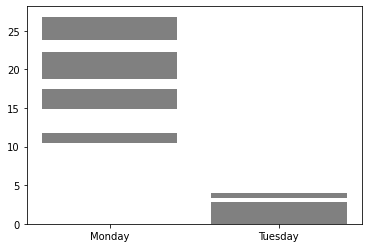

In [7]:
day = 1
for entry in entries:
    start, dur = entry
    print(start, dur)
#     if start >= 24: 
#         day = 2
    bar(day, dur, bottom=start, color='gray')
    if start <24 and start+dur>24:
        bar(day, 24-start, bottom=start, color='gray')
        day +=1
        bar(day, start+dur-24, bottom=0, color='gray')
        
plt.xticks([1,2],['Monday','Tuesday']);

# Week

In [25]:
n_weeks=1
one_day = timedelta(days=1)
# today = datetime.today()
today = datetime.date(2021,2,22)
last_monday = today + timedelta(days=-today.weekday())
for w in range(n_weeks):
    wk_monday = last_monday + timedelta(days=-7*w)
    wk_range = [(wk_monday + i*one_day) for i in range(7)]  # all days of the week from Monday to Sunday
    wrk_hrs, ref_hrs, avg_per_day = calc_worked_time_in_date_range(wk_range)
wk_range

[datetime.date(2021, 2, 22),
 datetime.date(2021, 2, 23),
 datetime.date(2021, 2, 24),
 datetime.date(2021, 2, 25),
 datetime.date(2021, 2, 26),
 datetime.date(2021, 2, 27),
 datetime.date(2021, 2, 28)]

In [26]:
def get_journal_for_strdate(strdate):
    """Extract total work time from given date
    param strdate: data in string format YYYY-MM-DD
    return (str) work_time (format HH:MM)
    """
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            text = f.read().strip()
    except FileNotFoundError as e:
        text = ""
    return text

wk_journals = [get_journal_for_strdate(dt.strftime(DATE_FORMAT_YMD)) for dt in wk_range]
wk_journals

["done:\n* general\n  - chat with Marcelo about rotations\n  - meet Terry Sejnowski about rotation in his lab\n    - He mentioned his student Robert Kim - decision, delay period, we read his paper about using ML to find new circuit motif that creates delayed period activity\n    - Ben Tsuda\n    - mentioned that the hippocampus is similar to cortex: \n      - ca3 - l2/3\n      - ca1 - l4/6\n      - dg - l4\n      - I didn't understand very well the mapping\n    - Asked me to check https://science.sciencemag.org/content/357/6355/1033?rss=1 and schedule another chat with Yusi to come up with a project\n      - rough idea about the paper: 1s interval between distal and basal inputs, if inputs come, place cell is formed\n* read Hertz chapter section about Boltzman machine\n* prepare presentation\n\n^Tucsd=0:55\n^Tucsd_yu-jc=5:30\n^Tucsd_yu-jc_meeting=1:15\n^Tucsd_class_cogs202=0:10\n^Tmaiseducacao=0:55\n^Tucsd_mattarlab_mouse-maze=2:05\n^Tucsd_book-club_rl_reading=0:10\n\n^S12:15^E13:00\n^

----- 2021-02-22
12.25 0.75
13.75 7.75
22.0 2.25
----- 2021-02-23
9.666666666666666 3.6666666666666665
15.333333333333334 5.666666666666667
22.416666666666668 1.6666666666666667
0.16666666666666666 2.9166666666666665
----- 2021-02-24
14.666666666666666 1.8333333333333333
17.583333333333332 0.5833333333333334
18.666666666666668 3.0
22.166666666666668 0.16666666666666666
22.416666666666668 5.0
----- 2021-02-25
9.833333333333334 1.0
13.083333333333334 0.5
14.833333333333334 6.25
----- 2021-02-26
10.0 3.5
13.833333333333334 9.833333333333334
----- 2021-02-27
9.5 0.3333333333333333
10.833333333333334 3.5833333333333335
14.583333333333334 1.0833333333333333
16.333333333333332 0.08333333333333333
19.5 1.6666666666666667
----- 2021-02-28
9.5 1.5833333333333333
11.416666666666666 1.0
12.666666666666666 3.9166666666666665
18.833333333333332 1.5
21.0 2.3333333333333335
23.75 5.666666666666667


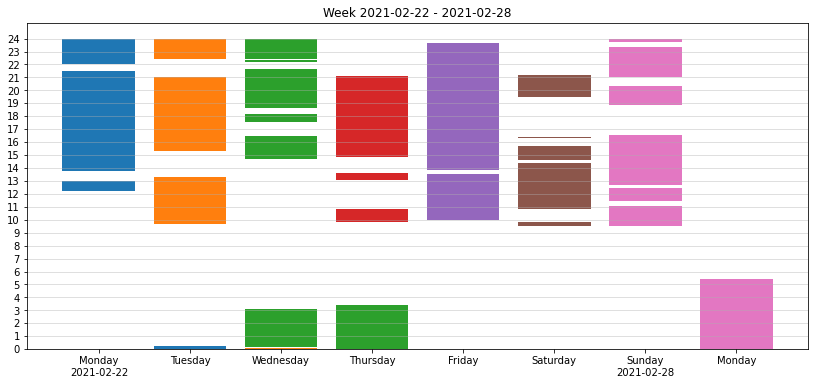

In [35]:
journals = wk_journals
# journals = example_journals

# one color per day of the week
COLORS=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink"]

plt.figure(figsize=(14,6))
for day, journal in enumerate(journals):
    print("-----", wk_range[day].strftime(DATE_FORMAT_YMD))
    starts, ends = check_worktimes(journals[day])
    
    work_blocks = create_workblocks_from_worktimes(starts,ends)
        
    previous_end = 0
    for work_block in work_blocks: # plot workblocks for a day
        start, dur = work_block
        print(start, dur)
        if start <24 and start+dur>24:
            bar(day, 24-start, bottom=start, color=COLORS[day])
            day +=1
            bar(day, start+dur-24, bottom=0, color=COLORS[day-1])    
        elif previous_end > start:
            day +=1
            bar(day, dur, bottom=start, color=COLORS[day-1])    
        else:
            bar(day, dur, bottom=start, color=COLORS[day])
            
        if start+dur<24:  # set previous_end
            previous_end = start+dur
        else:
            previous_end = start+dur - 24

str_monday = wk_range[0].strftime(DATE_FORMAT_YMD)
str_sunday = wk_range[-1].strftime(DATE_FORMAT_YMD)
plt.title("Week %s - %s" % (str_monday, str_sunday))
plt.xticks(range(8),['Monday\n%s' % str_monday,'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday\n%s' % str_sunday, 'Monday']);
plt.yticks(range(25))
plt.grid(True, axis='y', alpha=0.5)

### Change timedelta class
This could potentially be used to obviate the use of the str_to_timedelta and timedelta_to_str

In [13]:
class h_td (timedelta):
    def __new__(self, *args, **kwargs):
        str_time=kwargs.pop('str_time', None)
        obj =  super().__new__(self, *args, **kwargs)
#         if str_time is not None:
#             obj.seconds = int(str_time.split(":")[0]) * 3600 + int(str_time.split(":")[1]) * 60
        return obj
    def __init__(self, *args, **kwargs):
        str_time=kwargs.pop('str_time', None)
# #             super().__init__(seconds=int(kwargs['str_time'].split(":")[0]) * 3600 + int(kwargs['str_time'].split(":")[1]) * 60)
# #         else:
        super().__init__()
        if str_time is not None:
            self.seconds=int(str_time.split(":")[0]) * 3600 + int(str_time.split(":")[1]) * 60
    def __str__(self):
        return "%d:%02d" % (self.days*24 + self.seconds//3600, ((self.seconds // 60) % 60))
print(h_td(seconds=1320))

0:22


In [95]:
timedelta_to_str(timedelta(hours=12, minutes=10))

'12:10'

In [59]:
timedelta_to_str(h_td(seconds=12*3600+10*60))

'12:10'

In [91]:
h_td(str_time="12:10")

AttributeError: readonly attribute